# PCA

Principal component analysis -- some data exploration

Once I did a collinear features fix, the attack/no-attack data collapsed onto one principal component. (See Linear Discriminant notebook for breaking it down with a label-aware model.)

Plotting the PCA-vs-attack-category data was one way to
see how the attack categories overlap and are hard for models
to separate, but I ended up using the cluster chart for
my slides instead. These graphs never really got cleaned and 
polished. 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scikitplot.decomposition import plot_pca_component_variance, plot_pca_2d_projection

from data_read import data_read

In [2]:
%matplotlib inline
%load_ext watermark
%watermark -iv -p sklearn,scikitplot

matplotlib 3.0.2
pandas     0.24.0
numpy      1.15.4
sklearn 0.20.2
scikitplot 0.3.7


In [3]:
# load the data
labels = ['label', 'attack_cat']

df = data_read('train', 'fixed')
Y = df.loc[:,labels]
X = df.drop(columns=labels)

In [4]:
# PCA component variance -- how many dimensions does the data seem to have ?

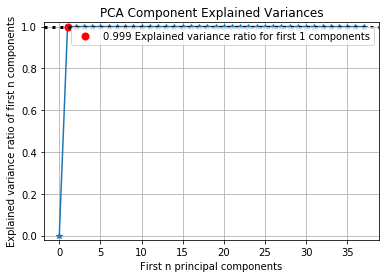

In [5]:
pca = PCA()
pca.fit(X)
plot_pca_component_variance(pca)
plt.show()

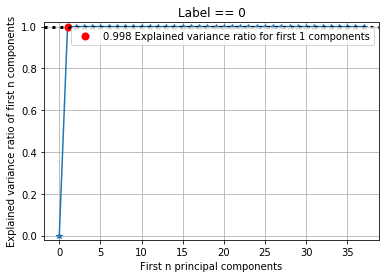

In [6]:
label0 = df.query('label == 0').drop(columns=labels)
label1 = df.query('label == 1').drop(columns=labels)

pca.fit(label0)
plot_pca_component_variance(pca, title="Label == 0")

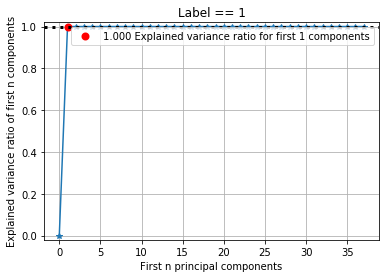

In [7]:
pca.fit(label1)
plot_pca_component_variance(pca, title="Label == 1")

# Two compenents 

Attack versus normal traffic

In [8]:
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
Xt = pd.DataFrame(Xt, columns=['x','y'])

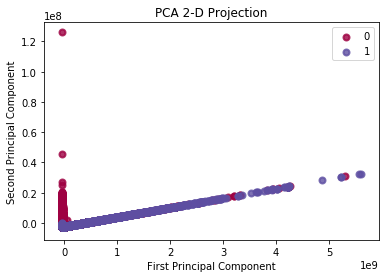

In [9]:
plot_pca_2d_projection(pca, X, Y.label)

In [10]:
Xt_labeled = pd.concat([Xt, Y.loc[:,['label','attack_cat']]], axis=1)

Text(0.5, 1.0, 'attack')

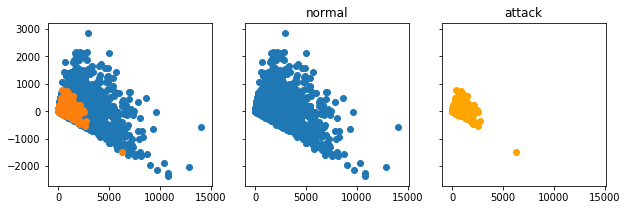

In [11]:
label0 = Xt_labeled.query('label == 0')
label1 = Xt_labeled.query('label == 1')
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10,3))
axs[0].scatter(label0.x, label0.y)
axs[0].scatter(label1.x, label1.y)
axs[1].scatter(label0.x, label0.y)
axs[1].set_title("normal")
axs[2].scatter(label1.x, label1.y, color='orange')
axs[2].set_title("attack")

# Exploits and DoS 

These are two categories that have been hard to separate and label correctly

In [12]:
label_ba = Xt_labeled.query("attack_cat == 'backdoors'")
label_an = Xt_labeled.query("attack_cat == 'analysis'")
label_fu = Xt_labeled.query("attack_cat == 'fuzzers'")
label_sh = Xt_labeled.query("attack_cat == 'shellcode'")
label_re = Xt_labeled.query("attack_cat == 'reconnaissance'")
label_ex = Xt_labeled.query("attack_cat == 'exploits'")
label_do = Xt_labeled.query("attack_cat == 'dos'")
label_wo = Xt_labeled.query("attack_cat == 'worms'")
label_ge = Xt_labeled.query("attack_cat == 'generic'")

Text(0.5, 1.0, 'dos')

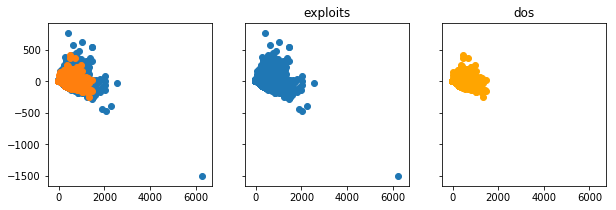

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10,3))
axs[0].scatter(label_ex.x, label_ex.y)
axs[0].scatter(label_do.x, label_do.y)
axs[1].scatter(label_ex.x, label_ex.y)
axs[1].set_title("exploits")
axs[2].scatter(label_do.x, label_do.y, color='orange')
axs[2].set_title("dos")

# Remaining labels

These are also going to be difficult to separate with linear-based models

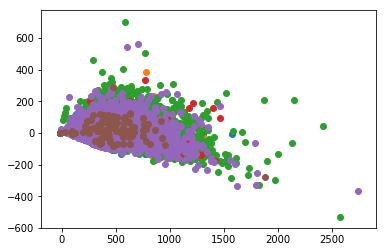

In [14]:
plt.scatter(label_ba.x, label_ba.y)
plt.scatter(label_an.x, label_an.y)
plt.scatter(label_fu.x, label_fu.y)
plt.scatter(label_sh.x, label_sh.y)
plt.scatter(label_re.x, label_re.y)
plt.scatter(label_wo.x, label_wo.y)